# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

### 1. Preparación de Datos

Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar valores faltantes, selección de variables dependientes e independientes, y dividir los datos en conjuntos de entrenamiento y prueba.

In [46]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
ruta = 'C:/Users/KeythiCL/Downloads/Ventas.csv'

df = pd.read_csv(ruta)
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [48]:
# Comprobar si hay valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [49]:
# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [50]:
escala = MinMaxScaler(feature_range=(0, 1))

# Eliminamos las columnas no deseadas y guardamos los nombres de las columnas que vamos a escalar
columnas_para_escalar = df.drop(["Ventas", "Fecha"], axis=1).columns

# Ajustamos el MinMaxScaler a las columnas restantes y transformamos los datos
normado = escala.fit_transform(df[columnas_para_escalar])

# Creamos un nuevo DataFrame con los datos normalizados y las columnas correctas
df_normado = pd.DataFrame(data=normado, columns=columnas_para_escalar)

# Si necesitas, puedes agregar las columnas no escaladas que has quitado previamente
df_normado["Ventas"] = df["Ventas"]
df_normado["Fecha"] = df["Fecha"]

# Ahora df_normado tiene los datos normalizados y las columnas no normalizadas originales
df_normado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [51]:
# Comprobación del tipo de dato de Fecha
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [52]:
# Identificar variables dependientes e independientes
X = df_normado.drop(['Ventas', 'Fecha'], axis = 1)
y = df_normado['Ventas']

In [79]:
# Dividir en conjuntos de entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

### 2. Análisis Exploratorio de Datos (EDA)

Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en festivos vs. no festivos y el impacto de las promociones.

In [54]:
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


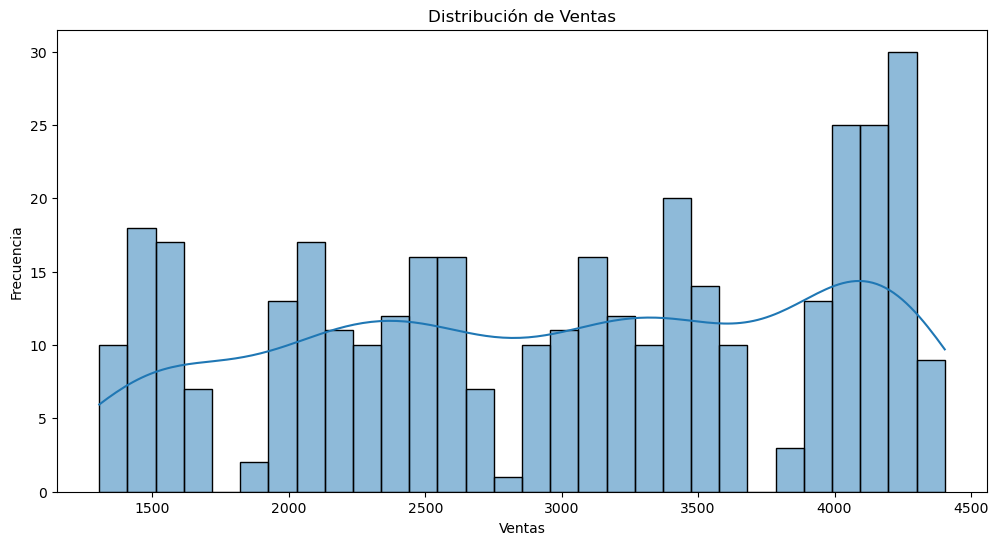

In [77]:
# Visualización de la distribución de ventas
plt.figure(figsize=(12, 6)) #especifica tamaño
sns.histplot(df['Ventas'], bins=30, kde=True) #bins es cant de barras y kde es la linea de densidad estimada
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia');

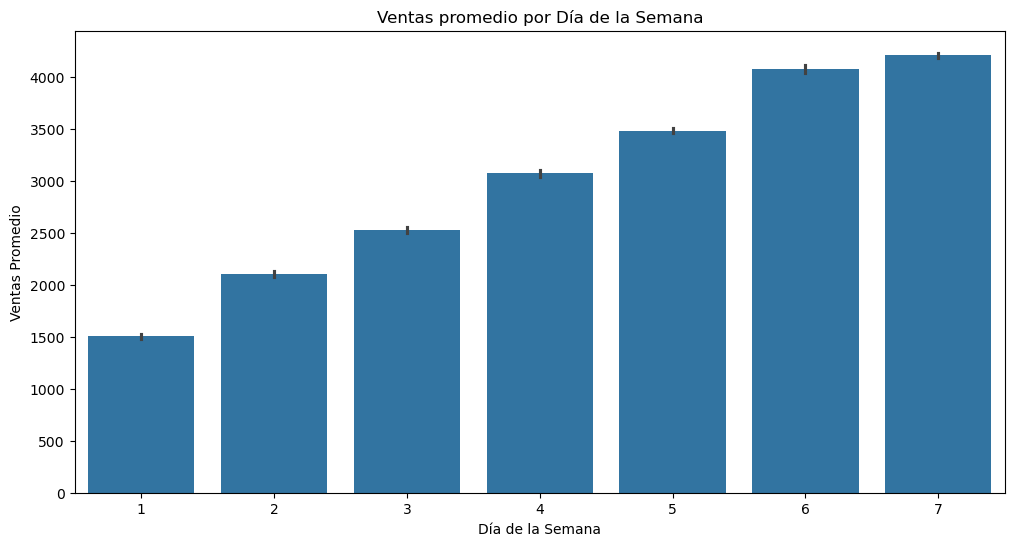

In [56]:
# Relación entre ventas y día de la semana con promedio de ventas
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DíaDeLaSemana', y='Ventas')
plt.title('Ventas promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio');

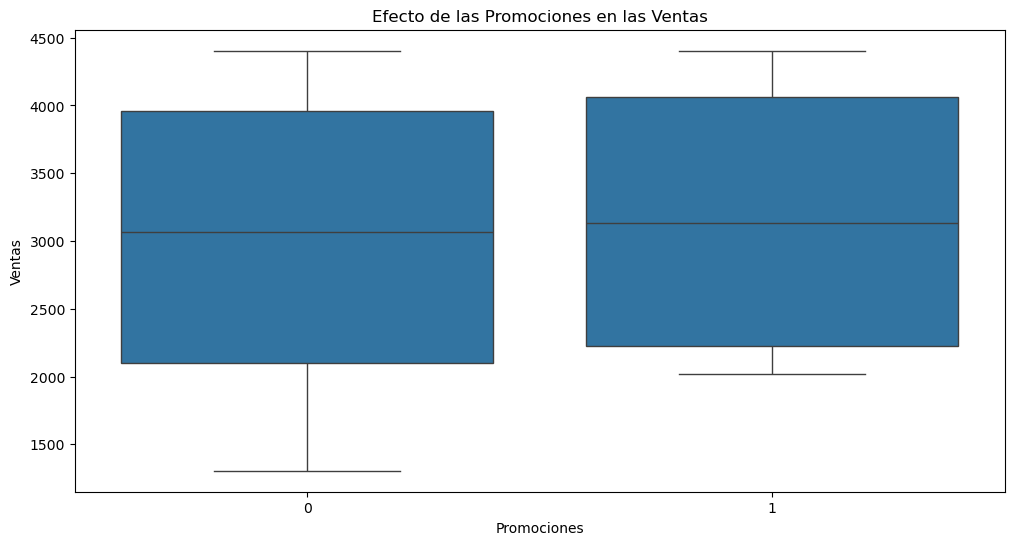

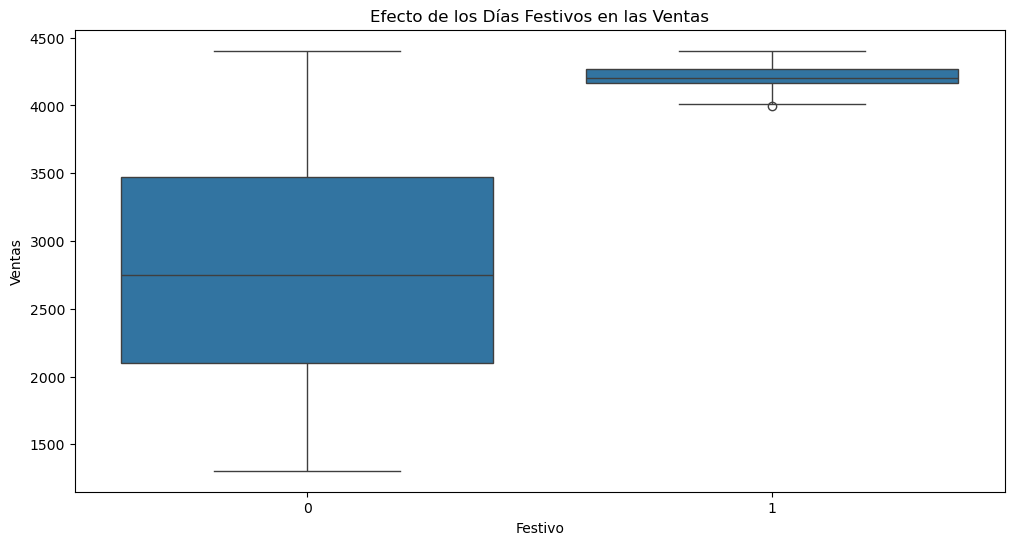

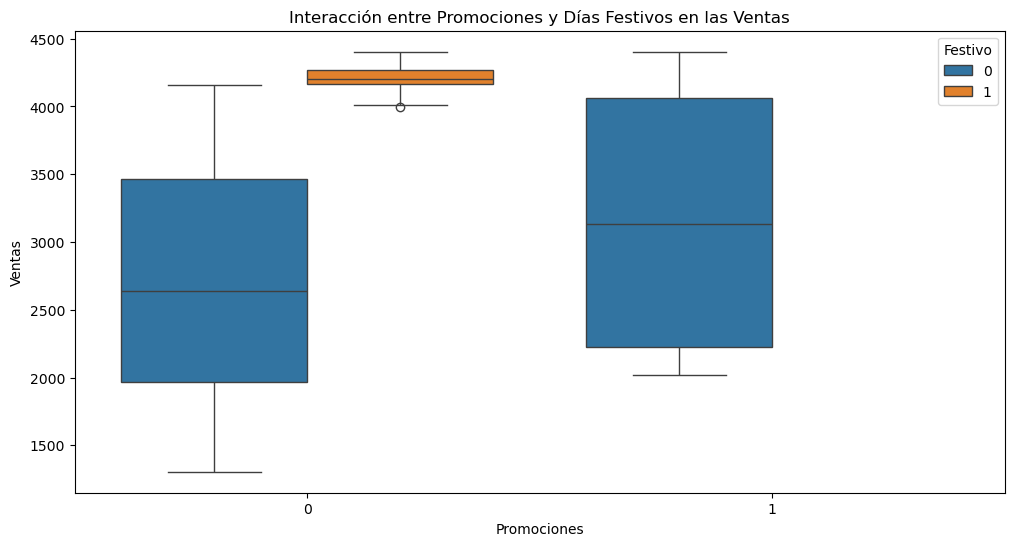

In [78]:
# boxplot para comparar las ventas con y sin promociones.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', data=df)
plt.title('Efecto de las Promociones en las Ventas')

# boxplot para comparar las ventas para los días normales y festivos.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Festivo', y='Ventas', data=df)
plt.title('Efecto de los Días Festivos en las Ventas')

# boxplot para ver la interacción entre promociones y días festivos en las ventas.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', hue='Festivo', data=df) #hue es el que divide cada grupo de x en subgrupos basados en la columna Festivo.
plt.title('Interacción entre Promociones y Días Festivos en las Ventas');

### 3. Selección de Modelo

Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la Regresión Lineal, los Árboles de Decisión, y los Bosques Aleatorios.

In [66]:
# almacenar modelos
modelos = [
    ("modelo lineal", LinearRegression()),
    ("modelo arbol", DecisionTreeRegressor(random_state=42)),
    ("modelo bosque", RandomForestRegressor(random_state=42))
]

In [67]:
# Entrenar modelos y mostrar puntajes
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje}')

modelo lineal: 0.9924245101323563
modelo arbol: 0.9923508015371342
modelo bosque: 0.9923097376813321


### 4. Entrenamiento y Evaluación del Modelo

Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las ventas reales vs. las predichas.

In [69]:
modelo = LinearRegression() #MODELO LINEAL

In [70]:
modelo.fit(X, y)

LinearRegression()

In [71]:
# Realizamos predicciones usando el conjunto de prueba
predicciones = modelo.predict(X_prueba)

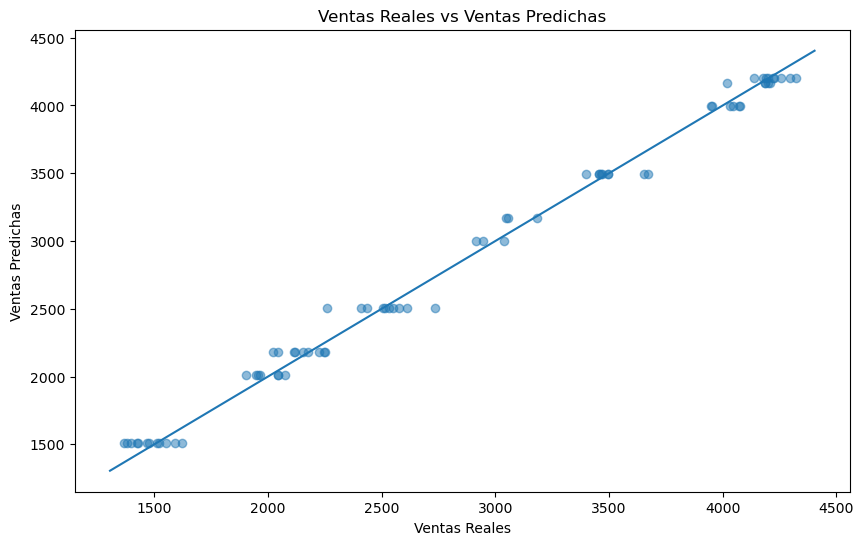

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_prueba,
            predicciones,
            alpha = 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas');

In [75]:
df_test = pd.DataFrame({'Real': y_prueba, 'Predicho': predicciones})
df_test = df_test.sort_index()

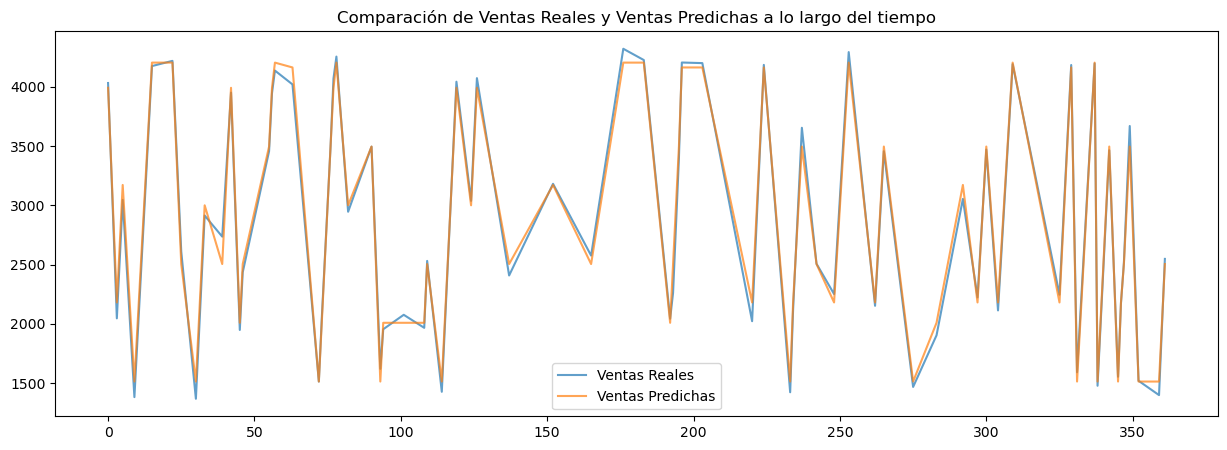

In [76]:
plt.figure(figsize=(15, 5))
plt.plot(df_test['Real'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title('Comparación de Ventas Reales y Ventas Predichas a lo largo del tiempo');

### 5. Conclusión

Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.

En primera instancia, se puede observar que los datos de las columnas son de int, excepto Fecha, por lo que lo primero que hicimos fue convertir Fecha en datetime. Despues, pasamos los datos a un max y min entre 0 y 1. Realizamos la normalización de los datos, donde comenzamos eliminando TODO meenos ventas y fecha que vamos a escalar, ajustamos el MinMax a las columnas restantes. Una vez terminada la normalización, creamos un dataframe basandonos en esos datos.
Antes de pasar a EDA, identificamos las variables dependientes e independientes, siendo "y2 (Ventas) lo que quiero determinar y dividimos las X e y en entrenamiento y prueba.
En el proceso de EDA, realizamos un histograma para observar la distribución de ventas, al tener la mayoria de las barras entre el 200 y 2500, podemos determinar que son las más frecuentes y hay menos ventas en los extremos (1500-2000 y 4000 y 4500), por lo que se puede determinar que las ventas estan en la media, o muy altos o muy bajos. Basandonos en el kde, podemos observar que hay variables que se salen de lo habitual.
Basandonos en la relación entr ventas y dia de semana, podemos determinar que las ventas van creciendo a medida que se vienen los fines de semana, de hecho los puntos más altos con una minima diferencia se encuentran en sabado y domingo.
De los boxplot podemos observar que:
- Con promoción LEVEMENTE hay más venta (0: sin y 1: con) -> SIN: Tienden a tender una mediana más baja y una variabilidad más grande. CON: Una mediana más alta y menos variabilidad.
- Con dia festivo el pico de ventas es bastante, se mantiene entre 4000 y 4500, pero sin dia festivo tiene mayor rango de distintas ventas --> Lo mismoq¿ que antes, mediana baja y con festivo más alta.
- En el tercero podemos observar la interaccion entre ventas, promociones y días festivos: En primer lugar, es interesante ver que NO se hacen promociones en días festivos y cuando hay promociones en días no festivos es más alto que sin, pero sigue siendo menos que los dias festivos.

Vemos que modelo me conviene: el lineal para este caso.
Despues de realizar las predicciones, nos encontramos con ventas reales vs ventas predichas: Si los puntos están cerca de la línea diagonal (y = x), el modelo es preciso y si los puntos están lejos de la línea diagonal, el modelo tiene errores de predicción.
Por ultimo, basandonos en el ultimo grafico, podemos determinar que se predijo bien, con muy pocas diferencias.